#### 회귀식

##### 단순 선형회귀

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [17]:
# 아버지, 아들 키만 추출
# 컬럼명 Father, Son으로 변경
# 단위 변경 inch -> centi
df.rename(columns={'Height':'Son'}, inplace=True)
df_sub = df[df['Gender']=='M'][['Father','Son']]*2.54


In [18]:
df_sub

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070
...,...,...
890,173.99,182.880
891,173.99,179.070
892,173.99,174.498
893,173.99,173.990


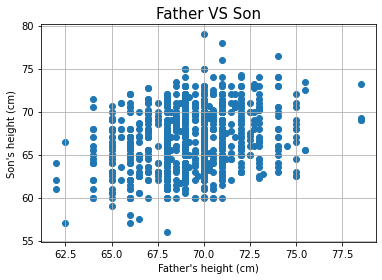

In [20]:
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father VS Son', fontsize=15)
plt.show()


  - 회귀선 구하여 그리기
     - np.linalg.lstsq()
     - np.polyfit() 

In [29]:
weight, bias = np.polyfit(df.Father, df.Son, 1) # X, Y, 차수
weight, bias

(0.3993812658985591, 39.110386837075744)

In [30]:
np.polyfit(df.Father, df.Son, 2)

array([-1.48560760e-02,  2.46213693e+00, -3.24015552e+01])

d:\edu\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


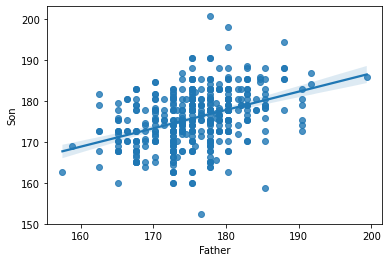

In [32]:
import seaborn as sns
sns.regplot('Father','Son', df_sub)
plt.show()


In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [37]:
# 학습
#lr.fit(df_sub[['Father']], df_sub['Son'])
lr.fit(df_sub.Father.values.reshape(-1,1), df_sub.Son.values)

LinearRegression()

In [41]:
# coefficient(계수)/ weight
lr.coef_

array([0.44774792])

In [42]:
# intercept(절편,편향)/ bias
lr.intercept_

97.17763700739333

In [43]:
# 잔차 제곱의 합(RSS" Residual Sum of Square)
lr._residues

17556.59951549399

In [44]:
# 평가 - R squared
lr.score(df.Father.values.reshape(-1,1), df.Son.values)

-294.0763594429231

In [47]:
from sklearn.metrics import r2_score
pred = lr.predict(df.Father.values.reshape(-1,1))
r2_score(df.Son.values, pred)

-294.0763594429231

  - 당뇨병 사례


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
# EDA
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [51]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [52]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

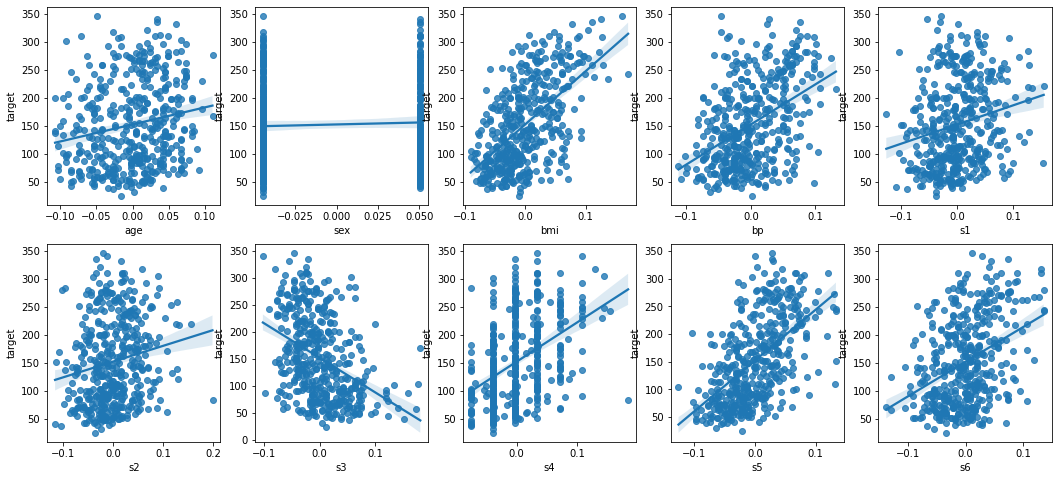

In [57]:
import seaborn as sns
_, axs = plt.subplots(2,5, figsize=(18,8))
for i, feat in enumerate(df.columns[:-1]):
    row, col = i // 5, i % 5
    sns.regplot(x=feat, y='target', data=df, ax = axs[row][col]) 
    

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [59]:
# 독립 변수와 종속 변수의 관계
for feat in df.columns[:-1]:
    X = df[feat].values.reshape(-1,1)
    lr.fit(X,diabetes.target)
    score = lr.score(X, diabetes.target)
    print(f'{feat}: {score:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


In [60]:
# BMI와 target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2022
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((397, 1), (45, 1), (397,), (45,))

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
# 계수, 절편, 잔차제곱의 합
lr.coef_, lr.intercept_, lr._residues

(array([939.55896022]), 151.79247763803028, 1578990.0125372214)

In [63]:
from sklearn.metrics import r2_score
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.46955604545525575

In [64]:
lr.score(X_test,y_test)

0.46955604545525575

In [65]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse

(3127.5719491232644, 55.924698918485596)

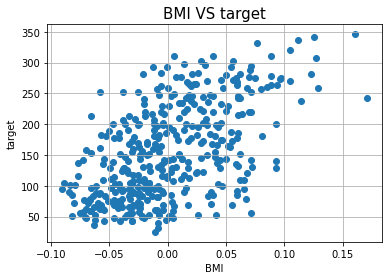

In [66]:
plt.scatter(X_train,y_train)
plt.grid()
plt.xlabel("BMI")
plt.ylabel("target")
plt.title('BMI VS target', fontsize=15)
plt.show()


In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df.bp.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2022
)

In [68]:
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression()

In [69]:
pred2 = lr2.predict(X_test2)

In [70]:
r2_score(y_test2, pred2), mean_squared_error(y_test2, pred2)

(-0.035300488435895394, 6104.27687751617)

In [71]:
r2_score(y_test, pred), r2_score(y_test2, pred2)

(0.46955604545525575, -0.035300488435895394)

In [72]:
mean_squared_error(y_test,pred), mean_squared_error(y_test2,pred2)

(3127.5719491232644, 6104.27687751617)

##### 다중선형회귀 ex) 보스턴 주택 가격

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

d:\edu\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [5]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel='CRIM', ylabel='price'>

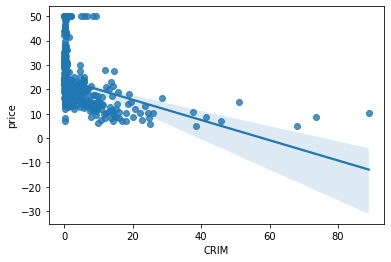

In [7]:
# feature별 산점도와 선형회귀선
sns.regplot(x='CRIM', y='price', data=df)

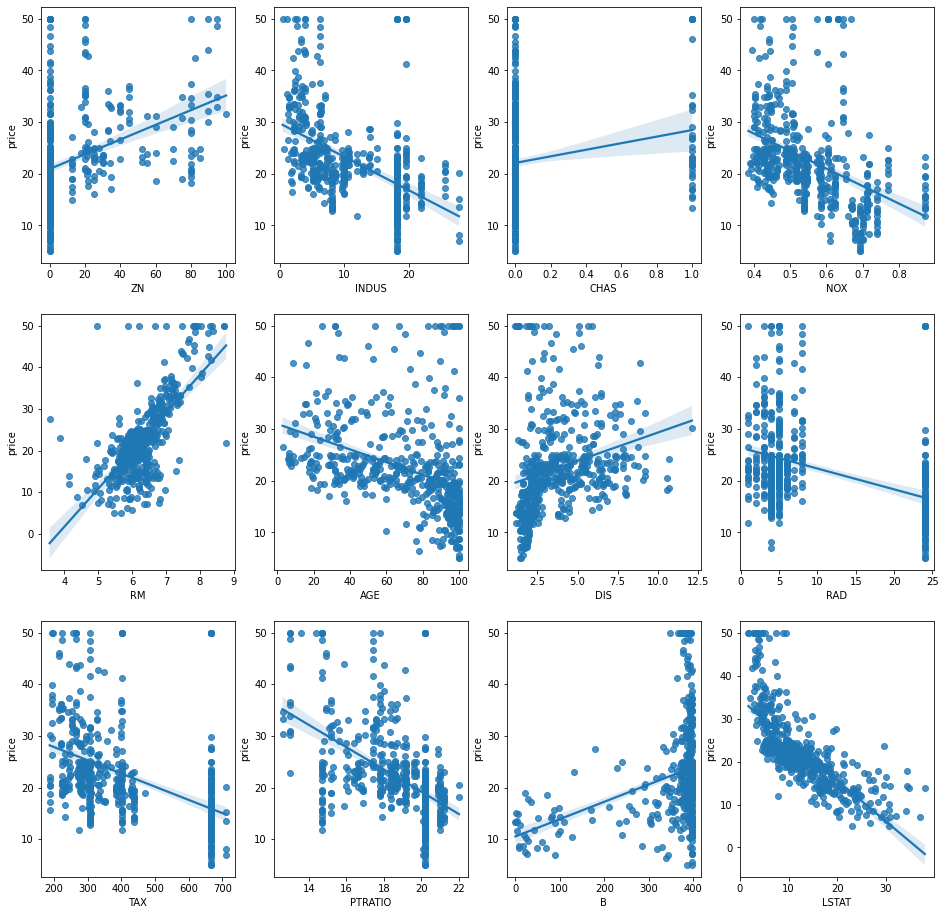

In [10]:
_, axs = plt.subplots(3, 4, figsize=(16,16))
for i, feat in enumerate(df.columns[1:-1]):
    row, col = i // 4, i % 4
    sns.regplot(x=feat, y='price', data=df, ax=axs[row, col])


In [11]:
# feature별 결정계수(R squared)
from sklearn.linear_model import LinearRegression

for feat in df.columns[:-1]:
    lr = LinearRegression()
    X = df[feat].values.reshape(-1,1)
    lr.fit(X,df.price.values)
    score = lr.score(X, df.price.values)
    print(f'{feat}:\t{score:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


In [13]:
# 다중공선성 문제 무시하고 진행
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=2022
)

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
# R-squared
lr.score(X_train, y_train)

0.7444811414684593

In [15]:
lr.coef_

array([-1.17731004e-01,  4.71909774e-02,  4.93242956e-02,  2.63851612e+00,
       -1.51441273e+01,  4.23531935e+00, -5.23740656e-03, -1.41099144e+00,
        2.91963685e-01, -1.19236187e-02, -8.95445411e-01,  9.80364965e-03,
       -5.27338430e-01])

In [16]:
lr.intercept_

30.950814924201055

In [17]:
X_test[0], y_test[0]

(array([1.3960e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
        6.1670e+00, 9.0000e+01, 2.4210e+00, 5.0000e+00, 3.8400e+02,
        2.0900e+01, 3.9269e+02, 1.2330e+01]),
 20.1)

In [20]:
np.dot(lr.coef_,X_test[0]) + lr.intercept_

21.227539118774924

In [23]:
# predict method
lr.predict(X_test[0].reshape(1,-1))

array([21.22753912])

In [27]:
for i in range(10):
    pred1 = np.dot(lr.coef_, X_test[i]) + lr.intercept_
    pred2 = lr.predict(X_test[i].reshape(1,-1))
    print(f'{i}번째\n실제값: {y_test[i]}\n계산된 예측 값: {pred1:.4f}\n모델 예측 값: {pred2[0]:.4f}\n')

0번째
실제값: 20.1
계산된 예측 값: 21.2275
모델 예측 값: 21.2275

1번째
실제값: 11.9
계산된 예측 값: 7.0638
모델 예측 값: 7.0638

2번째
실제값: 20.6
계산된 예측 값: 21.4743
모델 예측 값: 21.4743

3번째
실제값: 33.2
계산된 예측 값: 35.7832
모델 예측 값: 35.7832

4번째
실제값: 20.8
계산된 예측 값: 18.2366
모델 예측 값: 18.2366

5번째
실제값: 13.5
계산된 예측 값: 13.4321
모델 예측 값: 13.4321

6번째
실제값: 24.7
계산된 예측 값: 24.7007
모델 예측 값: 24.7007

7번째
실제값: 13.9
계산된 예측 값: 13.0563
모델 예측 값: 13.0563

8번째
실제값: 10.4
계산된 예측 값: 6.3579
모델 예측 값: 6.3579

9번째
실제값: 19.7
계산된 예측 값: 13.6734
모델 예측 값: 13.6734



- 다중 선형 회귀 모델 비교(Linear, Decision Tree, SVM, RF, XGBoost)

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
# Linear
pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

In [39]:
# Decision Tree
dtr = DecisionTreeRegressor(random_state=2022)
dtr.fit(X_train,y_train)
pred_dtr = dtr.predict(X_test)
r2_dtr = r2_score(y_test, pred_dtr)
mse_dtr = mean_squared_error(y_test, pred_dtr)

In [40]:
# SVR
svr = SVR()
svr.fit(X_train,y_train)
pred_svr = svr.predict(X_test)
r2_svr = r2_score(y_test, pred_svr)
mse_svr = mean_squared_error(y_test, pred_svr)

In [41]:
# RFR
rfr = RandomForestRegressor(random_state=2022)
rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)
r2_rfr = r2_score(y_test, pred_rfr)
mse_rfr = mean_squared_error(y_test, pred_rfr)

In [42]:
# XGboost
xgr = XGBRegressor(random_state=2022)
xgr.fit(X_train,y_train)
pred_xgr = xgr.predict(X_test)
r2_xgr = r2_score(y_test, pred_xgr)
mse_xgr = mean_squared_error(y_test, pred_xgr)

In [44]:
# 성능 비교
print(f'R2_Score\nLR: {r2_lr:.4f}\nDTR: {r2_dtr:.4f}\nSVR: {r2_svr:.4f}\nRFR: {r2_rfr:.4f}\nXGR: {r2_xgr:.4f}\n')
print(f'MSE\nLR: {mse_lr:.4f}\nDTR: {mse_dtr:.4f}\nSVR: {mse_svr:.4f}\nRFR: {mse_rfr:.4f}\nXGR: {mse_xgr:.4f}')

R2_Score
LR: 0.6740
DTR: 0.8359
SVR: 0.2758
RFR: 0.8174
XGR: 0.7691

MSE
LR: 27.3672
DTR: 13.7735
SVR: 60.7889
RFR: 15.3267
XGR: 19.3798


In [46]:
result_df = pd.DataFrame({
    'y_test':y_test, 'LR':pred_lr, 'DTR':pred_dtr, 'RFR':pred_rfr, 'SVR':pred_svr, 'XGR':pred_xgr
})
result_df.head()

,y_test,LR,DTR,RFR,SVR,XGR
0,20.1,21.227539,19.3,19.934,20.644693,19.616213
1,11.9,7.063817,13.8,12.616,16.130347,14.802561
2,20.6,21.474262,20.6,21.612,17.155498,20.054447
3,33.2,35.783213,33.2,35.803,24.229946,33.186317
4,20.8,18.236587,21.9,20.495,15.514814,18.820538
